## Introduction

Forest fires are a natural disaster that have significant environmental ramifications, and have increased in frequency which coincides with the issue of climate change. In the United States alone, over 70,000 forest fires burn an average of 7 million acres every year (1). Wildfires are often directly influenced by human interaction, with close to 90% having some link to a man-made ignition point (1). Another major factor in the spread of forest fires is the topography of the land. Fire travels much faster uphill than downhill, as it is able to preheat the fuel above the flames, meaning that the steeper the gradient of the hill, the faster the fire will spread (2). Finally, the type of fuel the fire is burning through contributes to the speed, flame size, and temperature of the fire. Larger fuels, such as trees and heavy slash (fallen branches, brush, etc.), burns hotter, with larger flame sizes than smaller fuels such as grass and thin brush (spread out over a larger area) (3). Historically, forests have contained roughly 50-70 trees per acre, while today, in some parts of the United States, forests contain anywhere from 500-1000 trees per acre (3). This overcrowding of forests has led to both high mortality rates among trees, and explosive forest fires that devastate entire tree populations in record times.

The forest fire model involves a multitude of physical factors, yet all of them cannot be evaluated in this project. This research will consider three physical attributes that can influence the spread of a fire: the varying slopes of hills and valleys, the type of fuel the fire is burning through, and the concentration of trees in the simulated forest. With lower probabilties for a contribution to fire spread, ground vegetation will have less of a chance of spreading from cell to cell than larger fuels like the trees in this scenario. In order to mimic a forest that has sub-optimum conditions for a forest fire, the concentration of trees for this project will be above 5000 trees per 10000 cells. Finally, in an effort to mimic terrain that doesn't rise and fall in an easily modeled fashion, the slopes that trees are on will be generated in a fashion that will be described in further detail in the model section below. The larger the slope value, the more likely the transition from one cell to the next.

While forest fires can have conditions that change rapidly, it is necessary to set up some constants that will set the boundaries for the model below. The size of the forest will be predetermined for each experiment, but the simulation will end once the probability for fire has been calculated for every cell within the "forest". The goal of this simulation is to experiment with ways to reduce the transition rate of fire from one cell to the next, in an effort to determine actual physical measures that humans can take to limit the impact of forest fires. Therefore, multiple simulations will be run with different possible values for slope size, and different values of ground vegetation fire transition. By the end of this project, the research should convey data on how the aforementioned factors relate to the spread of fire, as well as which preventitive measures (changing the variables) achieved effective results.

## Model

In order to simulate a forest, this project will generate a two-dimensional grid that assigns each cell a value of either empty, a tree, or an active burn designation. The constants in this project are the probabilities for a lightning strike, new tree growth, vegetation, as well as the fraction of the forest that is already occupied by trees. Using an initialized forest grid, the cell values are assigned based on whether the numerical values in the initialized grid add up to the determined numerical values for the cell designation, or are within the probability constants. The hill was determined using the two-dimensional Gaussian distribution function:
$ Aexp(−((x−xo)^2/(2σ_X^2)+(y−yo)^2/(2σ_Y^2)) $. The derivative of this function will also be used to determine the slope of each calculated cell. The forest simulation will involve a 100x100 grid, and the simulation will terminate once all of the cells have been evaluated for cell designation. The generated forest cell is shown below. The green cells are trees, the black cells are empty vegetation cells, and the orange cells are active fire cells.

## Numerical Methods

In order to solve the Gaussian function for this project, the x0 and y0 values will be established through the mean value of the hill coordinates to the nearest integer. The spread of the distribution will be calculated by subtracting the minimum coordinate value from the maximum coordinate value for both the x and y values. In order to find the slope at each point within the coordinate field, a point will be generated on each side of the selected coordinate and the generated point with the smaller coordinate value of the two will be subtracted from the larger point in order to determine the slope for the desired coordinate. This will be repeated for each coordinate point within the Gaussian distribution. The slope will then be measured against burn probabilities in order to assign a burn or empty designation. The forest generated outside of the hill will receive cell designations based on whether the coordinate values from the initialized forest grid add up to a numerical designation for cell assignment. If the cell designation is empty, a random number will be generated and if that number fits within the probability for new tree growth, it will be reassigned a tree designation. Finally, the ground vegetation will be determined through a random number generation and will be given an equal probability to burn or remain intact. These methods are limited by accuracy, as the slope will be a generalization, due to the both the method, and the nature of hills to not be exactly alligned with a Gaussian distribution. Also, the use of random numbers and probabilities limit the project, as these are merely estimates, and can not exactly replicate the varying behavior of forest fires.

## Code

In [13]:
rng = np.random.default_rng()  # Create a default random number Generator
print(rng.uniform(1, 3))       # Test case

2.486072421563174


Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-7-a9e7d8273b8c>", line 248, in animate
    animate.X = iterate(animate.X, 50, 80, 3)
  File "<ipython-input-7-a9e7d8273b8c>", line 148, in iterate
    ground_vegetation(X)
  File "<ipython-input-7-a9e7d8273b8c>", line 25, in ground_vegetation
    X1[iy,ix] = EMPTY
NameError: name 'iy' is not defined


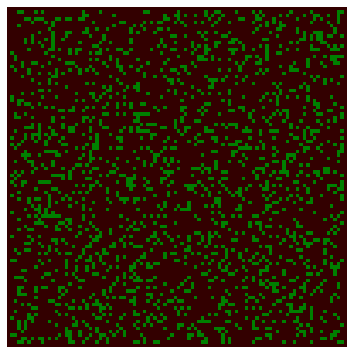

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

X1 = 1                                #defining an initial X1 so the code runs

def ground_vegetation(X):
    
    """Determines whether a space is empty vegetation or on fire.
    
    Given the determination that ground fuel doesn't burn consistently, this function
    assigns a burn designation for cells determined to have ground vegetation, based on a
    random generation of a number. Only possibilities are empty cells, which indicates 
    non-burning ground vegetation, or fire designation, indicating vegetation on fire.
    
    x = randomly generated number which is the basis for the burn designation."""
    
    x = np.random.random()
    
    if x < .5:
        X1[iy,ix] = FIRE
    
    else:
        X1[iy,ix] = EMPTY
    
    return X1[iy, ix]


def Gaussian(X, hill_min, hill_max, A):
    
    """Determines burn status for fuel on a determined hill.
    
    Using the dervative of the Two Dimensional Gaussian distribution, this function
    evaluates the slope at each point within the range, and proceeds to assign a burn
    probability for that point. The burn probability is then used to evaluate whether
    each point is on fire or not.
    
    y0 = y-coordinate center of hill
    
    x0 = x-coordinate center of hill
    
    range_max = last point evaluated within the hill
    
    hill_min = x,y coordinate of the beginning of the hill
    
    hill_max = x,y coordinate of the end of the hill
    
    x_spread = spread of distribution in x axis
    
    y_spread = spread of distribution in y axis
    
    A = variable for amplitude of hill
    
    X2 = list of burn assignments for cells on the hill."""
    
    X2 = []                                                #initializes burn list
    
    y0 = (hill_max - hill_min)//2                        #determines center point/peak of the hill
    x0 = (hill_max - hill_min)//2                        #in both x and y coordinates
    
    range_max = (hill_max - hill_min) + 1                #sets range for point calculation
    
    x_spread = hill_max - hill_min                       #sets the spread of the distribution
    y_spread = hill_max - hill_min
    
    for x in range(1, range_max):
        for y in range(1, range_max):
            #value for larger generated coordinate point
            t = A * np.exp(-((((x+.5)-x0)^2/(2*(x_spread^2))) + (((y+.5)-y0)^2/(2*(y_spread^2)))))
            #value for smaller generated coordinate point
            q = A * np.exp(-((((x-.5)-x0)^2/(2*(x_spread^2))) + (((y-.5)-y0)^2/(2*(y_spread^2)))))
            
            slope = t - q      #determines slope value
            
            if slope > 1:         #if slope is steep, FIRE designation is guaranteed
                X2.append(2)
                
            elif -1 < slope < 1:           #at top of hill, probability of FIRE decreases linearly
                x = np.random.random()
                
                if x > .25:
                    X2.append(2)
                else:
                    X2.append(1)
                    
            else:
                x = np.random.random       #going downhill, probability of FIRE decreases further linearly
                
                if x > .5:
                    X2.append(2)
                else:
                    X2.append(1)
        
    
    
    
    return X2
    
    
    
    
    
    
# the neighbourhood is the nearest 8 cells to the point in consideration
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2    #number values for cell designations


# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)               #sets up colors for simulation
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)


def iterate(X, hill_min, hill_max, A):
    """Iterate the forest according to the forest-fire rules.
    
    Given the number values for cell designation, this function generates a forest of
    empty cells of ground vegetation, cells with trees that aren't on fire, and cells
    that are actively burning. It also generates a hill within the forest.
    
    X = initialized forest grid
    
    hill_min = beginning of hill coordinates
    
    hill_max = end of hill coordinates
    
    X1 = coordinate list with the cell designations
    
    A = variable for amplitude of hill
    
    """

    
    X1 = np.zeros((ny, nx))              #initializes cells in the forest
    for ix in range(1, hill_min):
        for iy in range(1,hill_min):     #values for cells before the hill
            if X[iy,ix] == EMPTY and np.random.random() <= p: #assigns tree values based on new-tree growth
                X1[iy,ix] = TREE                              #probability
            
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
            
            if X[iy, ix] == EMPTY and p < np.random.random() < b: #generates vegetation burn designations
                ground_vegetation(X)
                
                for dx,dy in neighbourhood:
                    
                    if X[iy+dy,ix+dx] == FIRE:          #assigns a FIRE designation for cells within the neighborhood
                        X1[iy, ix] == FIRE              #that have a numerical value equal to the FIRE value
                        break
                       
                    
                else:
                    if np.random.random() <= f:        #assigns a FIRE designation for cells that are struck
                        X1[iy,ix] = FIRE               #by lightning based on the lightning probability
     
    
    for ix in range(hill_min,hill_max):       #assigns cell designations for cells within the hill
        for iy in range(hill_min,hill_max):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            
            if X[iy,ix] == TREE:                     #determines tree and empty cells for the hill
                X1[iy,ix] = TREE
            
            if X[iy, ix] == EMPTY and p < np.random.random() < b:
                ground_vegetation(X)                #determines ground vegetation cells
                
        for iy in range(hill_min, hill_max):        #assigns burn designations for the hill
            Gaussian(hill_min, hill_max, A)
            
            length = len(X2)                        #determines length of list
            
           
            for i in range(0, length-1):
                
                w = X2[i]                           #determines value of coordinate point 
                
                if w == 2:
                    X1[iy, ix] == FIRE  #assigns cell designation for hill coordinates
                
                else:
                    X1[iy, ix] == TREE
                
                        
                        
                        
    for ix in range(hill_max,nx-1):
        for iy in range(hill_max,ny-1):            #values for cells after the hill
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
                                                   #determines tree and empty cells
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
            
            if X[iy, ix] == EMPTY and p < np.random.random() < b:
                ground_vegetation(X)               #determines ground vegetation cells
                
                for dx,dy in neighbourhood:
                    
                    if X[iy+dy,ix+dx] == FIRE:     #assigns a FIRE designation for cells within the neighborhood
                        X1[iy, ix] == FIRE         #that have a numerical value equal to the FIRE value
                        break
                   
                    
                
                else:
                    if np.random.random() <= f:   #assigns a FIRE designation for cells that are struck
                        X1[iy,ix] = FIRE          #by lightning based on the lightning probability
                        
    return X1


# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2

# Probability of new tree growth per empty cell, vegetation per empty cell, and of lightning strike.
p, b, f = 0.05, .85, .001

# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# Creates the forest grid used in the iteration function
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

#creates the plot
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)


def animate(i):
    
    """Creates an animation progression for each generation of iteration function.
    
    Uses the iteration function to display the results of the fire simulation.
    
    X = the initialized forest grid."""
    
    im.set_data(animate.X)
    animate.X = iterate(animate.X, 50, 80, 3)


animate.X = X

# Interval between frames
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()

Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-8-82e0ece65dbd>", line 35, in animate
    animate.X = iterate(animate.X, 50, 80, 5)
  File "<ipython-input-7-a9e7d8273b8c>", line 148, in iterate
    ground_vegetation(X)
  File "<ipython-input-7-a9e7d8273b8c>", line 25, in ground_vegetation
    X1[iy,ix] = EMPTY
NameError: name 'iy' is not defined


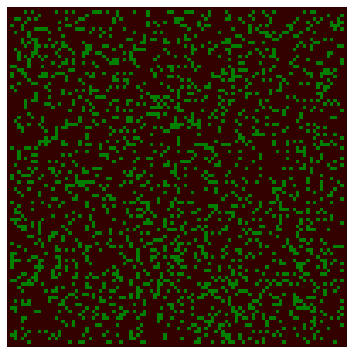

In [8]:
#Second test case with higher lightning, lower vegetation, and lower new-growth probabilties. Gaussian hill is also
#steeper


# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2

# Probability of new tree growth per empty cell, vegetation per empty cell, and of lightning strike.
p, b, f = 0.04, .70, .003

# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# Creates the forest grid used in the iteration function
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

#creates the plot
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)


def animate(i):
    
    """Creates an animation progression for each generation of iteration function.
    
    Uses the iteration function to display the results of the fire simulation.
    
    X = the initialized forest grid."""
    
    im.set_data(animate.X)
    animate.X = iterate(animate.X, 50, 80, 5)


animate.X = X

# Interval between frames
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()

Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/opt/tljh/user/lib/python3.7/site-packages/matplotlib/animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-9-56d91c791c02>", line 35, in animate
    animate.X = iterate(animate.X, 50, 80, 2)
  File "<ipython-input-7-a9e7d8273b8c>", line 148, in iterate
    ground_vegetation(X)
  File "<ipython-input-7-a9e7d8273b8c>", line 25, in ground_vegetation
    X1[iy,ix] = EMPTY
NameError: name 'iy' is not defined


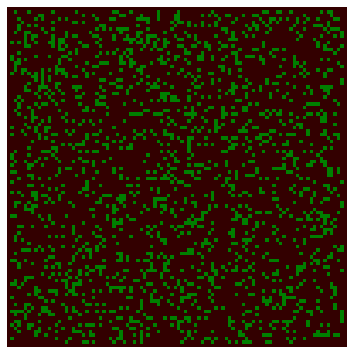

In [9]:
#Third test case with lower lightning, higher vegetation, and higher new-growth probabilties. Gaussian hill is also
#less steep


# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2

# Probability of new tree growth per empty cell, vegetation per empty cell, and of lightning strike.
p, b, f = 0.10, .9, .0005

# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

# Creates the forest grid used in the iteration function
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

#creates the plot
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)


def animate(i):
    
    """Creates an animation progression for each generation of iteration function.
    
    Uses the iteration function to display the results of the fire simulation.
    
    X = the initialized forest grid."""
    
    im.set_data(animate.X)
    animate.X = iterate(animate.X, 50, 80, 2)


animate.X = X

# Interval between frames
interval = 100
anim = animation.FuncAnimation(fig, animate, interval=interval)
plt.show()